In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42
shipping = pd.read_csv('data/people.csv')


In [3]:
shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87048 entries, 0 to 87047
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   person_id         87048 non-null  int64  
 1   id                87048 non-null  object 
 2   type              87048 non-null  object 
 3   parent            87048 non-null  object 
 4   name              86990 non-null  object 
 5   dob               16573 non-null  object 
 6   age               69755 non-null  float64
 7   place_of_birth    85660 non-null  object 
 8   home_address      13283 non-null  object 
 9   name_of_ship      85022 non-null  object 
 10  ship_port         69996 non-null  object 
 11  date_leaving      70858 non-null  object 
 12  joined_ship_date  78873 non-null  object 
 13  joined_at_port    77337 non-null  object 
 14  capacity          86606 non-null  object 
 15  date_left         66774 non-null  object 
 16  left_port         65534 non-null  object

In [4]:
shipping.head()

,person_id,id,type,parent,name,dob,age,place_of_birth,home_address,name_of_ship,...,date_leaving,joined_ship_date,joined_at_port,capacity,date_left,left_port,cause_of_leaving,sign_with_mark,notes,Unnamed: 20
0,33522,vtls004589021_0_13,sailor,vtls004589021,william cunningham,NaN,19.0,liverpool,NaN,adroit,...,1873-12,1874-01-01,NaN,ordinary seaman,1874-03-19,newcastle,discharged,n,NaN,NaN
1,33523,vtls004589021_0_14,sailor,vtls004589021,evan griffiths,NaN,21.0,portmadoc,NaN,jane owens,...,1874-04,1874-05-15,porthmadog,able seaman,NaN,NaN,remains on board,n,remains on board,NaN
2,33524,vtls004589021_0_12,sailor,vtls004589021,henry evans,NaN,27.0,aberystwyth,NaN,adroit,...,1873-12,1874-01-01,NaN,bosun,NaN,NaN,remains on board,n,remains on board,NaN
3,33525,vtls004589069_0_14,sailor,vtls004589069,david evans,NaN,16.0,aberaeron,NaN,adroit,...,remains,1876-01-01,maryport,ordinary seaman,NaN,NaN,remains on board,n,remains on board,NaN
4,33526,vtls004589021_1_13,sailor,vtls004589021,richard jones,NaN,20.0,aberystwyth,NaN,adroit,...,1874-06,1874-07-01,NaN,ordinary seaman,NaN,NaN,remains on board,n,remains on board,NaN


In [5]:
len(shipping)

87048

In [6]:
shipping.describe(include="all")

,person_id,id,type,parent,name,dob,age,place_of_birth,home_address,name_of_ship,...,date_leaving,joined_ship_date,joined_at_port,capacity,date_left,left_port,cause_of_leaving,sign_with_mark,notes,Unnamed: 20
count,87048.000000,87048,87048,87048,86990,16573,69755.000000,85660,13283,85022,...,70858,78873,77337,86606,66774,65534,82216,85833,9785,31
unique,NaN,87048,1,5659,27769,147,NaN,4697,7179,18241,...,5043,12518,1075,425,11516,1262,125,13,6210,26
top,NaN,vtls004649205_2_15,sailor,vtls004640036,john jones,1866,NaN,aberystwyth,aberystwyth,first ship,...,continued,continued,cardiff,able seaman,remains,liverpool,discharged,n,remains on board,see above note
freq,NaN,1,87048,172,1909,560,NaN,12367,801,1530,...,3212,1449,9807,26270,1206,5608,51949,78821,362,3
mean,77045.500000,NaN,NaN,NaN,NaN,NaN,29.104107,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,25128.737453,NaN,NaN,NaN,NaN,NaN,11.670387,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,33522.000000,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,55283.750000,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,77045.500000,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,98807.250000,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
null_columns = shipping.columns[shipping.isnull().any()]
shipping[null_columns].isnull().sum()

name                   58
dob                 70475
age                 17293
place_of_birth       1388
home_address        73765
name_of_ship         2026
ship_port           17052
date_leaving        16190
joined_ship_date     8175
joined_at_port       9711
capacity              442
date_left           20274
left_port           21514
cause_of_leaving     4832
sign_with_mark       1215
notes               77263
Unnamed: 20         87017
dtype: int64

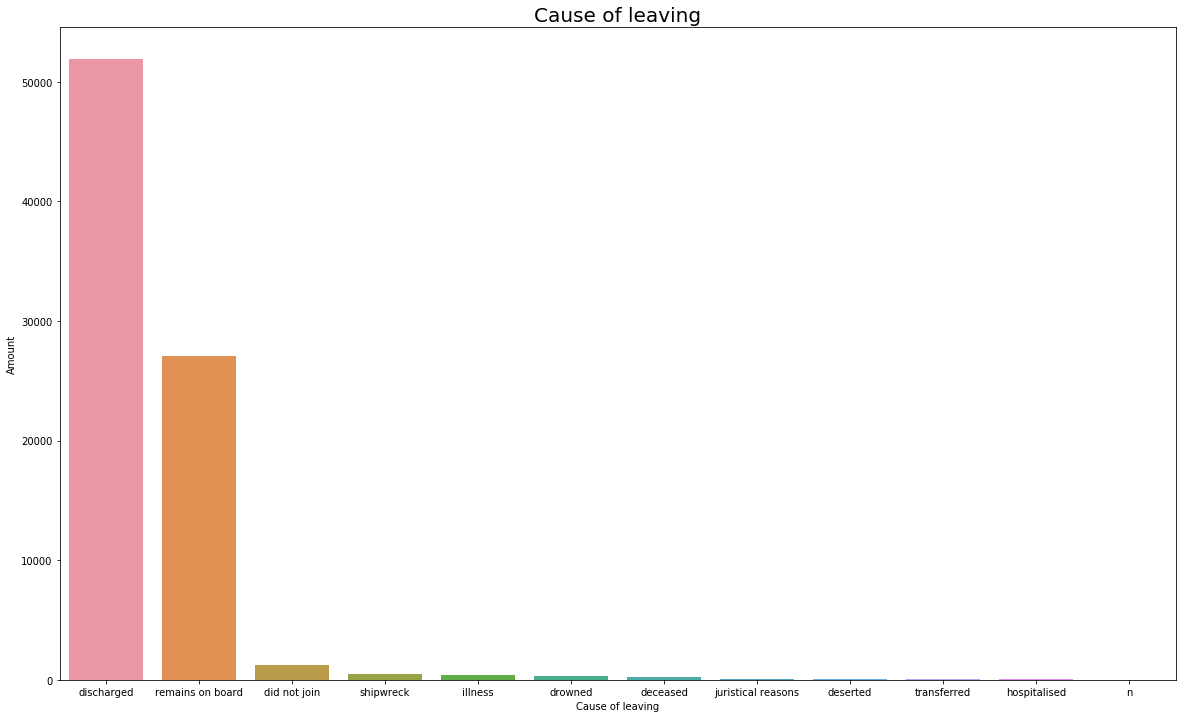

In [8]:
plt.figure(figsize=(20,12))
ax = sns.countplot(x='cause_of_leaving', data=shipping, order=shipping.cause_of_leaving.value_counts().iloc[:12].index)
ax.set(xlabel='Cause of leaving', ylabel='Amount')
plt.title("Cause of leaving", fontsize=20)
plt.show()

In [9]:
pd.options.display.max_rows = 1000
shipping['cause_of_leaving'].value_counts()

discharged                                 51949
remains on board                           27064
did not join                                1206
shipwreck                                    495
illness                                      367
drowned                                      286
deceased                                     194
juristical reasons                            99
deserted                                      89
transferred                                   61
hospitalised                                  36
n                                             20
abandoned                                     20
ship laid up                                  20
vessel sank                                   17
voluntary                                     16
vessel foundered                              15
other                                         15
injured                                       13
crew scuttled ship                            12
end of voyage       

[Text(0, 0.5, 'Relative amount'), Text(0.5, 0, 'Age')]

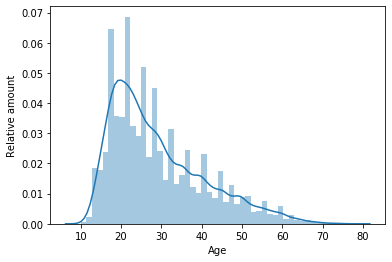

In [10]:
ax = sns.distplot(shipping['age'])
ax.set(xlabel='Age', ylabel='Relative amount')

In [11]:

#df = shipping.dropna(how='all', subset=['date_left', 'joined_ship_date'])
df = shipping[shipping['date_left'].str.match('^[0-9]{4}(-[0-9]{2}){2}')== True]

#print(df['date_left'].value_counts())
#dates['joined_ship_date'].value_counts()
#df['joined_ship_date'] = pd.to_datetime(df['joined_ship_date'])
#df['date_left'] = pd.to_datetime(df['date_left'])

ParserError: day is out of range for month: 1869-02-69